In [122]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# DATA EXPLORATION
# read the csv file
data_url = "https://raw.githubusercontent.com/orlandojmarin/HouseSalesInKingCounty/refs/heads/main/kc_house_data.csv"

king_county_housing = pd.read_csv(data_url)

# show the first 5 rows of data
king_county_housing.head()

# show summary stats of the data (21,613 rows, 21 columns)
summary_stats = king_county_housing.describe()
print(summary_stats)

# show how many empty cells are in each column (no empty cells)
king_county_housing.isnull().sum()

# show the data type of each column
data_types = king_county_housing.dtypes
print(data_types)

# show the first 10 rows of data
king_county_housing.head(10)

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [123]:
# DATA CLEANING AND PREP
# make sure the "date" column is read as a date
king_county_housing["date"] = pd.to_datetime(king_county_housing["date"])

# check for duplicate rows (no duplicates)
duplicate_rows = king_county_housing.duplicated().sum()

# print how many duplicate rows there are in a message
print(f"There are {duplicate_rows} duplicate rows in the data.\n")

# drop the "id" column since it is a unique identifier, won't be needed for modeling
king_county_housing = king_county_housing.drop("id", axis=1)

# rename the zipcode column to zip_code
king_county_housing = king_county_housing.rename(columns={"zipcode": "zip_code"})

# treat the "zipcode" column as categorical instead of an integer
king_county_housing["zip_code"] = king_county_housing["zip_code"].astype(str)

# show how many homes have 0 bedrooms
zero_bedrooms = king_county_housing[king_county_housing["bedrooms"] == 0]
print(f"There are {len(zero_bedrooms)} rows with 0 bedrooms.\n")

# show how many homes have 0 bathrooms
zero_bathrooms = king_county_housing[king_county_housing["bathrooms"] == 0]
print(f"There are {len(zero_bathrooms)} rows with 0 bathrooms.\n")

# remove rows with 0 bedrooms or 0 bathrooms
king_county_housing = king_county_housing[king_county_housing["bedrooms"] != 0]
king_county_housing = king_county_housing[king_county_housing["bathrooms"] != 0]

# show how many homes have 0 bedrooms
zero_bedrooms = king_county_housing[king_county_housing["bedrooms"] == 0]
print(f"There are now {len(zero_bedrooms)} homes with 0 bedrooms.\n")

# show how many homes have 0 bathrooms
zero_bathrooms = king_county_housing[king_county_housing["bathrooms"] == 0]
print(f"There are now {len(zero_bathrooms)} homes with 0 bathrooms.\n")

# show how many homes have 0 for the yr_renovated column
zero_renovated = king_county_housing[king_county_housing["yr_renovated"] == 0]
print(f"There are {len(zero_renovated)} homes with 0 for the yr_renovated column.\n")

# replace 0 in yr_renovated column with the corresponding value from yr_built
king_county_housing["yr_renovated"] = np.where(king_county_housing["yr_renovated"] == 0, king_county_housing["yr_built"], king_county_housing["yr_renovated"])

# show how many zip codes there are (70)
print(f"There are {len(king_county_housing['zip_code'].unique())} zip codes in the data.\n")

# REVISIT
# drop the zipcode column since we already have lat and long columns
king_county_housing = king_county_housing.drop("zip_code", axis=1)

# show how many rows have 0 for the sqft_basement column
zero_basement = king_county_housing[king_county_housing["sqft_basement"] == 0]
print(f"There are {len(zero_basement)} rows with 0 for the sqft_basement column.\n")

# create a column called "has_basement", where 0 means there isn't a basement, where sqft_basement is equal to 0, and 1 means there is a basement, where sqft_basement is greater than 0
king_county_housing["has_basement"] = np.where(king_county_housing["sqft_basement"] == 0, 0, 1)

# show the unique values for waterfront column
print(f"The unique values for the waterfront column are: {king_county_housing['waterfront'].unique()}.\n")

# show the unique values for the view column
print(f"The unique values for the view column are: {king_county_housing['view'].unique()}.\n")

# show the unique values for the condition column
print(f"The unique values for the condition column are: {king_county_housing['condition'].unique()}.\n")

# REVISIT
# remove the columns: sqft_above and sqft_basement since they are factored into the sqft_living column, and since I created a binary has_basement column
king_county_housing = king_county_housing.drop(["sqft_above", "sqft_basement"], axis=1)

# show the unique values for the bedrooms column
print(f"The unique values for the bedrooms column are: {king_county_housing['bedrooms'].unique()}.\n")

# identify outliers for price
Q1 = king_county_housing["price"].quantile(0.25)
Q3 = king_county_housing["price"].quantile(0.75)
IQR = Q3 - Q1

# calculate the upper and lower bounds for price outliers and print the results
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"The lower bound for price outliers is: ${lower_bound:,.2f}")
print(f"The upper bound for price outliers is: ${upper_bound:,.2f}\n")

# remove rows with price outliers
king_county_housing = king_county_housing[(king_county_housing["price"] >= lower_bound) & (king_county_housing["price"] <= upper_bound)]

# identify outlires for sqft_lot
Q1 = king_county_housing["sqft_lot"].quantile(0.25)
Q3 = king_county_housing["sqft_lot"].quantile(0.75)
IQR = Q3 - Q1

# calculate the upper and lower bounds for sqft_lot outliers and print the results
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"The lower bound for sqft_lot outliers is: {lower_bound:,.2f}")
print(f"The upper bound for sqft_lot outliers is: {upper_bound:,.2f}\n")

# remove rows with sqft_lot outliers
king_county_housing = king_county_housing[(king_county_housing["sqft_lot"] >= lower_bound) & (king_county_housing["sqft_lot"] <= upper_bound)]

# remove the row where the number of bedrooms is 33 since it is an extreme outlier
king_county_housing = king_county_housing[king_county_housing["bedrooms"] != 33]

# show the first few rows of data
king_county_housing.head()

There are 0 duplicate rows in the data.

There are 13 rows with 0 bedrooms.

There are 10 rows with 0 bathrooms.

There are now 0 homes with 0 bedrooms.

There are now 0 homes with 0 bathrooms.

There are 20683 homes with 0 for the yr_renovated column.

There are 70 zip codes in the data.

There are 13110 rows with 0 for the sqft_basement column.

The unique values for the waterfront column are: [0 1].

The unique values for the view column are: [0 3 4 2 1].

The unique values for the condition column are: [3 5 4 1 2].

The unique values for the bedrooms column are: [ 3  2  4  5  1  6  7  8  9 11 10 33].

The lower bound for price outliers is: $-162,500.00
The upper bound for price outliers is: $1,129,500.00

The lower bound for sqft_lot outliers is: -2,977.38
The upper bound for sqft_lot outliers is: 18,295.62



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,has_basement
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,1955,47.5112,-122.257,1340,5650,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,47.7210,-122.319,1690,7639,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,1933,47.7379,-122.233,2720,8062,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,1965,47.5208,-122.393,1360,5000,1
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,1987,47.6168,-122.045,1800,7503,0


In [124]:
# show the summary stats of the cleaned dataset
king_county_housing.describe()

# show the updated data types
# king_county_housing.dtypes


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,has_basement
count,18229,1.822900e+04,18229.000000,18229.000000,18229.000000,18229.000000,18229.000000,18229.000000,18229.000000,18229.000000,18229.000000,18229.000000,18229.000000,18229.000000,18229.000000,18229.000000,18229.000000,18229.000000
mean,2014-10-29 22:40:41.340720896,4.671466e+05,3.314279,2.028485,1910.652861,7214.459652,1.475890,0.001755,0.154479,3.407647,7.470020,1970.189094,1972.322508,47.560426,-122.227107,1866.621921,7238.234078,0.384881
min,2014-05-02 00:00:00,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1900.000000,1900.000000,47.155900,-122.512000,460.000000,651.000000,0.000000
25%,2014-07-22 00:00:00,3.100000e+05,3.000000,1.500000,1370.000000,4803.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1950.000000,1953.000000,47.474300,-122.337000,1440.000000,4960.000000,0.000000
50%,2014-10-17 00:00:00,4.260000e+05,3.000000,2.000000,1800.000000,7189.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1972.000000,1976.000000,47.569700,-122.265000,1750.000000,7200.000000,0.000000
75%,2015-02-18 00:00:00,5.880000e+05,4.000000,2.500000,2350.000000,9225.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1998.000000,1999.000000,47.680100,-122.149000,2190.000000,8926.000000,1.000000
max,2015-05-24 00:00:00,1.127000e+06,11.000000,7.500000,7350.000000,18295.000000,3.500000,1.000000,4.000000,5.000000,12.000000,2015.000000,2015.000000,47.777600,-121.315000,5380.000000,196591.000000,1.000000
std,NaN,2.046773e+05,0.886730,0.705277,727.757106,3461.937070,0.543134,0.041862,0.600316,0.648329,0.979963,29.924011,29.434930,0.137952,0.133803,585.670246,4313.013500,0.486581


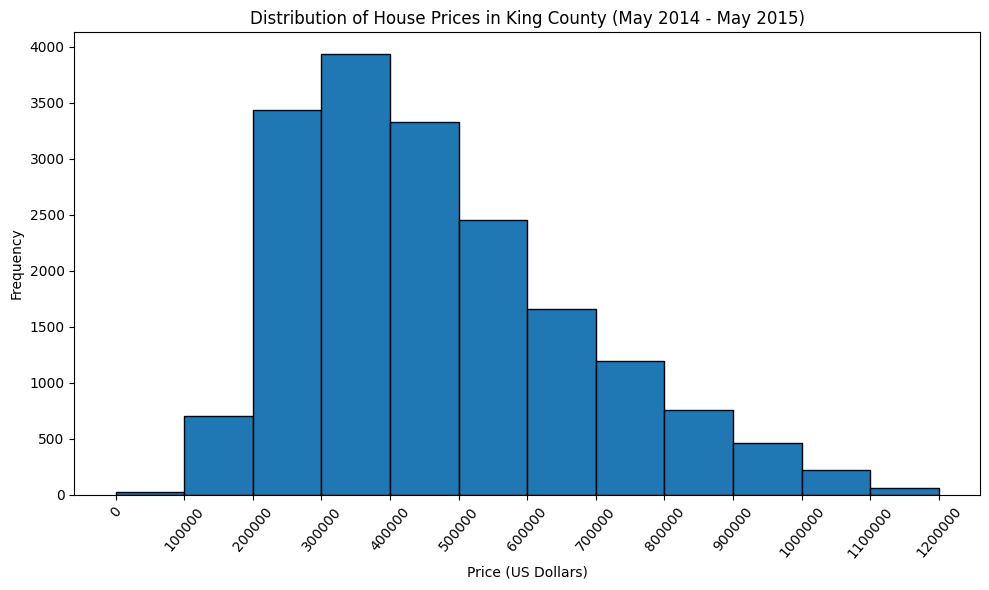

In [125]:
# DATA VISUALIZATIONS

# Calculate max price and set bin size
max_price = king_county_housing["price"].max()
bins = range(0, int(max_price) + 100000, 100000)

plt.figure(figsize=(10, 6))
plt.hist(king_county_housing["price"], bins=bins, edgecolor="black")

# Label axes and title
plt.xlabel("Price (US Dollars)")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices in King County (May 2014 - May 2015)")

# Create custom x-axis labels from the bin values
labels = []  # Start with an empty list for the labels
for b in bins:
    labels.append(str(b))  # Convert each bin value to a string and add it to the list

# Apply the custom tick labels to the x-axis
plt.xticks(ticks=bins, labels=labels, rotation=50)

# Ensure layout looks clean
plt.tight_layout()
plt.show()

In [126]:
# create a map that shows the location of the 10 homes with the highest price and the 10 homes with the lowest price. Make their markers different colors

import folium

# Create map centered around the mean latitude and longitude
map_center = [king_county_housing["lat"].mean(), king_county_housing["long"].mean()]
map = folium.Map(location=map_center, zoom_start=10)

# Sort the DataFrame by price and get the top 40 highest and lowest priced homes
top_40_highest = king_county_housing.nlargest(40, 'price')
top_40_lowest = king_county_housing.nsmallest(40, 'price')

# Add markers for the 50 highest priced homes (in red)
for _, row in top_40_highest.iterrows():
    folium.Marker(
        [row["lat"], row["long"]],
        popup=f"Price: ${row['price']:,}",
        icon=folium.Icon(color='red')
    ).add_to(map)

# Add markers for the 10 lowest priced homes (in green)
for _, row in top_40_lowest.iterrows():
    folium.Marker(
        [row["lat"], row["long"]],
        popup=f"Price: ${row['price']:,}",
        icon=folium.Icon(color='green')
    ).add_to(map)

# Display the map
map







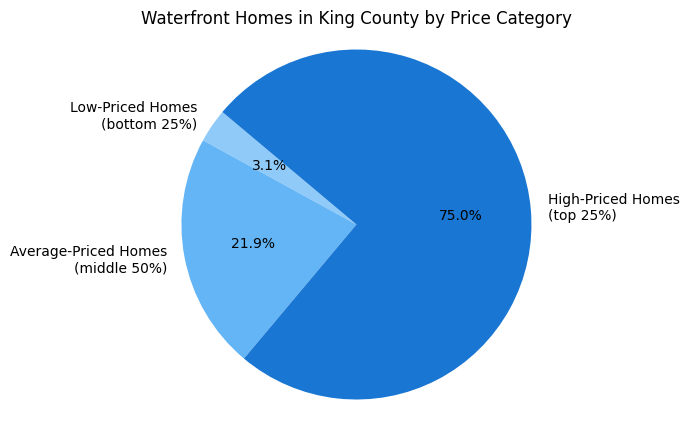

In [127]:
# DATA VISUALIZATION

# Break up the homes into 3 categories: low_priced (bottom 25%), average_priced (middle 50%), and high_priced (top 25%)

low_priced = king_county_housing[king_county_housing["price"] <= king_county_housing["price"].quantile(0.25)]

average_priced = king_county_housing[(king_county_housing["price"] > king_county_housing["price"].quantile(0.25)) & (king_county_housing["price"] <= king_county_housing["price"].quantile(0.75))]

high_priced = king_county_housing[king_county_housing["price"] > king_county_housing["price"].quantile(0.75)]

# create one pie chart that shows the percentage of homes in each category (low, average, high) that have waterfront views

# Count waterfront homes in each category
low_waterfront = low_priced[low_priced["waterfront"] == 1].shape[0]
avg_waterfront = average_priced[average_priced["waterfront"] == 1].shape[0]
high_waterfront = high_priced[high_priced["waterfront"] == 1].shape[0]

# Total waterfront homes across all categories
total_waterfront = low_waterfront + avg_waterfront + high_waterfront

# Calculate percentages
sizes = [
    (low_waterfront / total_waterfront) * 100,
    (avg_waterfront / total_waterfront) * 100,
    (high_waterfront / total_waterfront) * 100
]

# Labels
labels = ['Low-Priced Homes\n(bottom 25%)', 'Average-Priced Homes\n(middle 50%)', 'High-Priced Homes\n(top 25%)']

# Create pie chart
plt.figure(figsize=(7, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#90caf9', '#64b5f6', '#1976d2'])
plt.title('Waterfront Homes in King County by Price Category')
plt.axis('equal')
plt.show()



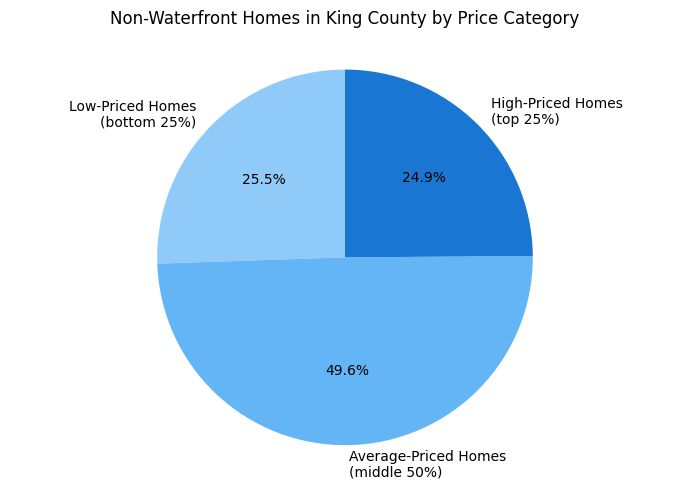

In [128]:
# DATA VISUALIZATION

# Break up the homes into 3 categories: low_priced (bottom 25%), average_priced (middle 50%), and high_priced (top 25%)

low_priced = king_county_housing[king_county_housing["price"] <= king_county_housing["price"].quantile(0.25)]

average_priced = king_county_housing[(king_county_housing["price"] > king_county_housing["price"].quantile(0.25)) & (king_county_housing["price"] <= king_county_housing["price"].quantile(0.75))]

high_priced = king_county_housing[king_county_housing["price"] > king_county_housing["price"].quantile(0.75)]

# create one pie chart that shows the percentage of homes in each category (low, average, high) that don't have waterfront views

# Count non-waterfront homes in each category
low_no_waterfront = low_priced[low_priced["waterfront"] == 0].shape[0]
avg_no_waterfront = average_priced[average_priced["waterfront"] == 0].shape[0]
high_no_waterfront = high_priced[high_priced["waterfront"] == 0].shape[0]

# Total non-waterfront homes across all categories
total_non_waterfront = low_no_waterfront + avg_no_waterfront + high_no_waterfront

# Calculate percentages
sizes = [
    (low_no_waterfront / total_non_waterfront) * 100,
    (avg_no_waterfront / total_non_waterfront) * 100,
    (high_no_waterfront / total_non_waterfront) * 100
]

# Labels
labels = ['Low-Priced Homes\n(bottom 25%)', 'Average-Priced Homes\n(middle 50%)', 'High-Priced Homes\n(top 25%)']

# Create pie chart (rotated to avoid overlap with title)
plt.figure(figsize=(7, 5))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,  # Rotate the pie to shift label positions
    colors=['#90caf9', '#64b5f6', '#1976d2']
)
# Add some padding below the title
plt.title('Non-Waterfront Homes in King County by Price Category', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

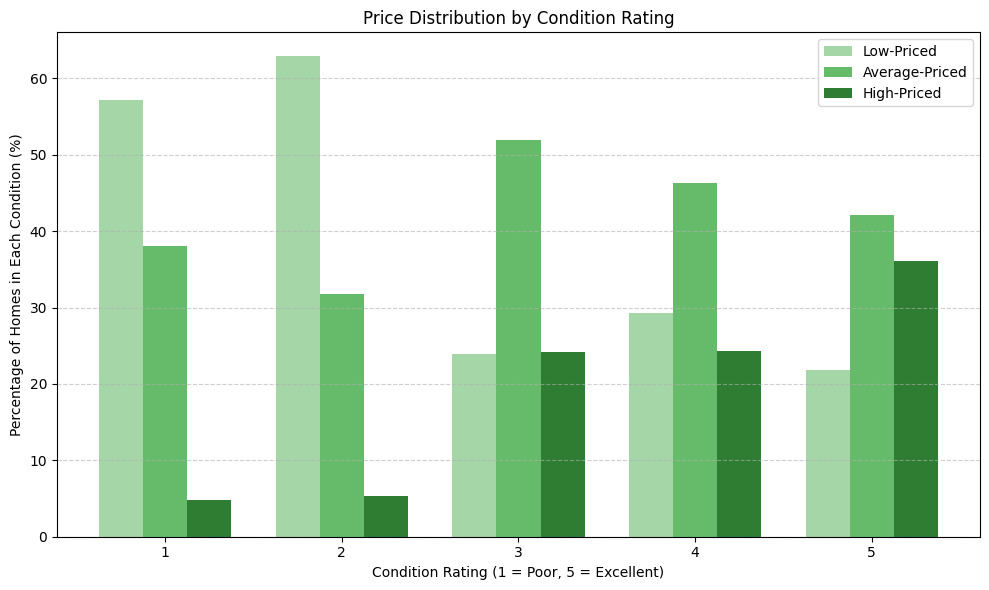

In [129]:
# create a triple bar graph that shows the percentage of low, average, and high priced homes aligned with each condition category

# Step 1: Count the number of homes by condition for each price category
low_condition_counts = low_priced['condition'].value_counts().sort_index()
avg_condition_counts = average_priced['condition'].value_counts().sort_index()
high_condition_counts = high_priced['condition'].value_counts().sort_index()

# Step 2: Combine into a DataFrame for easier manipulation
condition_categories = range(1, 6)
condition_df = pd.DataFrame({
    'Low-Priced': [low_condition_counts.get(c, 0) for c in condition_categories],
    'Average-Priced': [avg_condition_counts.get(c, 0) for c in condition_categories],
    'High-Priced': [high_condition_counts.get(c, 0) for c in condition_categories]
}, index=condition_categories)

# Step 3: Convert to percentages so that each row adds up to 100%
condition_percentages = condition_df.div(condition_df.sum(axis=1), axis=0) * 100

# Step 4: Plot the triple bar graph
x = np.arange(len(condition_categories))  # x-axis positions
bar_width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, condition_percentages['Low-Priced'], width=bar_width, label='Low-Priced', color='#a5d6a7')
plt.bar(x, condition_percentages['Average-Priced'], width=bar_width, label='Average-Priced', color='#66bb6a')
plt.bar(x + bar_width, condition_percentages['High-Priced'], width=bar_width, label='High-Priced', color='#2e7d32')

# Step 5: Formatting
plt.xlabel("Condition Rating (1 = Poor, 5 = Excellent)")
plt.ylabel("Percentage of Homes in Each Condition (%)")
plt.title("Price Distribution by Condition Rating")
plt.xticks(x, condition_categories)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


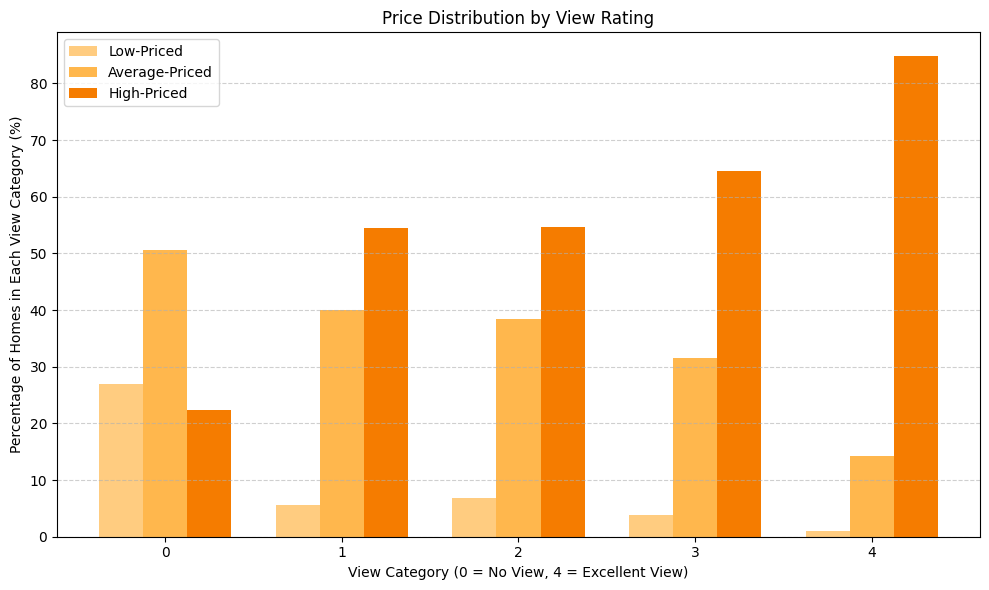

In [130]:
# create a triple bar graph that shows the percentage of low, average, and high priced homes aligned with each view category

# Step 1: Count the number of homes by 'view' for each price category
low_view_counts = low_priced['view'].value_counts().sort_index()
avg_view_counts = average_priced['view'].value_counts().sort_index()
high_view_counts = high_priced['view'].value_counts().sort_index()

# Step 2: Combine into a DataFrame for easier manipulation
view_categories = range(0, 5)  # assuming view categories are 0, 1, 2, 3, 4
view_df = pd.DataFrame({
    'Low-Priced': [low_view_counts.get(c, 0) for c in view_categories],
    'Average-Priced': [avg_view_counts.get(c, 0) for c in view_categories],
    'High-Priced': [high_view_counts.get(c, 0) for c in view_categories]
}, index=view_categories)

# Step 3: Convert to percentages so that each row adds up to 100%
view_percentages = view_df.div(view_df.sum(axis=1), axis=0) * 100

# Step 4: Plot the triple bar graph
x = np.arange(len(view_categories))  # x-axis positions
bar_width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, view_percentages['Low-Priced'], width=bar_width, label='Low-Priced', color='#ffcc80')  # Changed colors
plt.bar(x, view_percentages['Average-Priced'], width=bar_width, label='Average-Priced', color='#ffb74d')  # Changed colors
plt.bar(x + bar_width, view_percentages['High-Priced'], width=bar_width, label='High-Priced', color='#f57c00')  # Changed colors

# Step 5: Formatting
plt.xlabel("View Category (0 = No View, 4 = Excellent View)")
plt.ylabel("Percentage of Homes in Each View Category (%)")
plt.title("Price Distribution by View Rating")
plt.xticks(x, view_categories)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


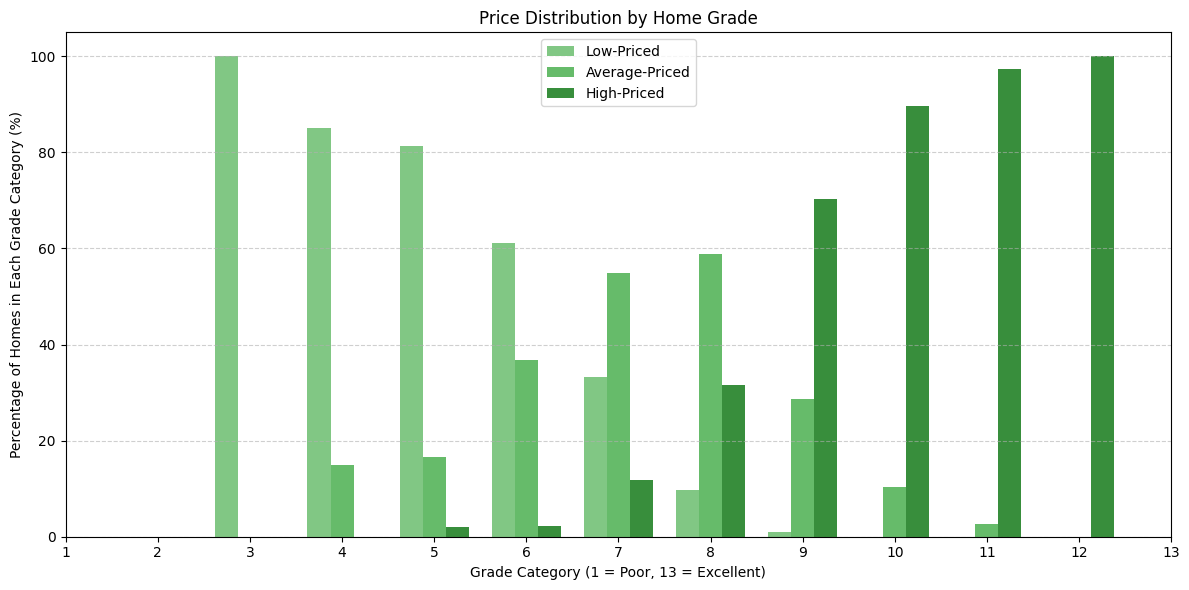

In [131]:
# create a triple bar graph that shows the percentage of low, average, and high priced homes aligned with each grade category

# Step 1: Count the number of homes by 'grade' for each price category
low_grade_counts = low_priced['grade'].value_counts().sort_index()
avg_grade_counts = average_priced['grade'].value_counts().sort_index()
high_grade_counts = high_priced['grade'].value_counts().sort_index()

# Step 2: Combine into a DataFrame for easier manipulation
grade_categories = range(1, 14)  # assuming grade categories are 1 through 13
grade_df = pd.DataFrame({
    'Low-Priced': [low_grade_counts.get(c, 0) for c in grade_categories],
    'Average-Priced': [avg_grade_counts.get(c, 0) for c in grade_categories],
    'High-Priced': [high_grade_counts.get(c, 0) for c in grade_categories]
}, index=grade_categories)

# Step 3: Convert to percentages so that each row adds up to 100%
grade_percentages = grade_df.div(grade_df.sum(axis=1), axis=0) * 100

# Step 4: Plot the triple bar graph
x = np.arange(len(grade_categories))  # x-axis positions
bar_width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, grade_percentages['Low-Priced'], width=bar_width, label='Low-Priced', color='#81c784')  # Changed colors
plt.bar(x, grade_percentages['Average-Priced'], width=bar_width, label='Average-Priced', color='#66bb6a')  # Changed colors
plt.bar(x + bar_width, grade_percentages['High-Priced'], width=bar_width, label='High-Priced', color='#388e3c')  # Changed colors

# Step 5: Formatting
plt.xlabel("Grade Category (1 = Poor, 13 = Excellent)")
plt.ylabel("Percentage of Homes in Each Grade Category (%)")
plt.title("Price Distribution by Home Grade")
plt.xticks(x, grade_categories)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


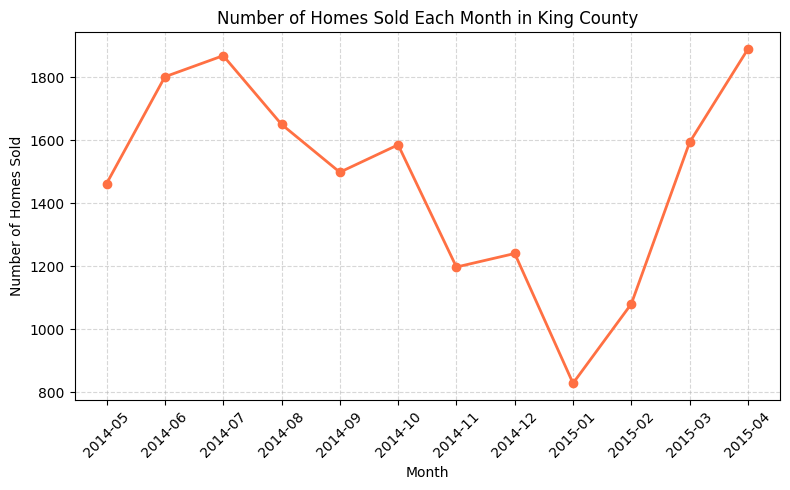

In [132]:
# Create a 'year_month' column from the existing datetime-formatted 'date' column
king_county_housing['year_month'] = king_county_housing['date'].dt.to_period('M')

# Group by 'year_month' and count number of homes sold
monthly_sales = king_county_housing.groupby('year_month').size()

# Remove the last month (May 2015)
monthly_sales = monthly_sales[monthly_sales.index < monthly_sales.index.max()]

# Plot the line graph
plt.figure(figsize=(8, 5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', color='#ff7043', linewidth=2)

# Add titles and labels
plt.title("Number of Homes Sold Each Month in King County")
plt.xlabel("Month")
plt.ylabel("Number of Homes Sold")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



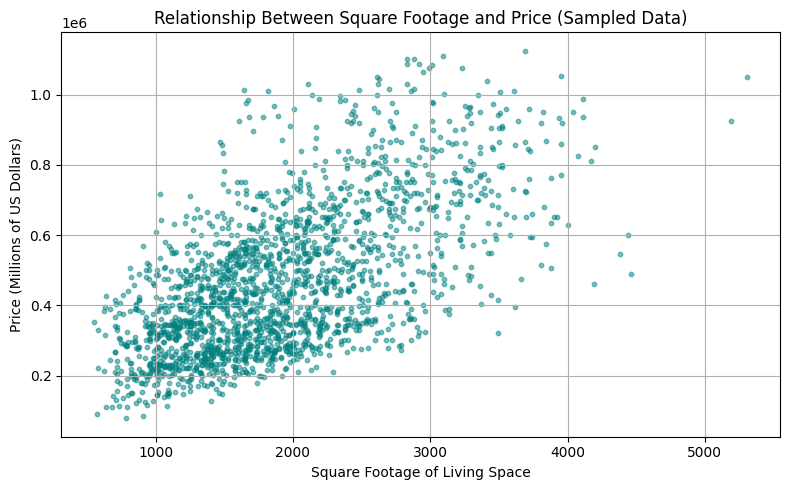

In [133]:
# create a scatter plot that shows the relationship between sqft_living and price

# Sample 2,000 random rows from the dataset
sampled_data = king_county_housing.sample(n=2000, random_state=42)

# Plot the sample
plt.figure(figsize=(8, 5))
plt.scatter(sampled_data["sqft_living"], sampled_data["price"], alpha=0.5, s=10, color='teal')
plt.title("Relationship Between Square Footage and Price (Sampled Data)")
plt.xlabel("Square Footage of Living Space")
plt.ylabel("Price (Millions of US Dollars)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [134]:
# ------------------------------
# LINEAR REGRESSION MODEL
# ------------------------------

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# remove the 'year_month' column from the existing datetime-formatted 'date' column
king_county_housing = king_county_housing.drop("year_month", axis=1)

# 1. Define your features and target variable
X = king_county_housing.drop(["price", "date"], axis=1)  # drop non-numeric/date columns
y = king_county_housing["price"]

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize Linear Regression model
linear_reg = LinearRegression()

# 5. Fit model
linear_reg.fit(X_train_scaled, y_train)

# 6. Make predictions
y_pred = linear_reg.predict(X_test_scaled)

# 7. Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 8. Print results
print("Linear Regression Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: ${mse**0.5:,.2f}")
print(f"R-squared Score: {r2:.4f}")
print(f"Mean House Price in Test Set: ${y_test.mean():,.2f}")

print()
cv_scores_linear = cross_val_score(linear_reg, X_train_scaled, y_train, cv=5, scoring='r2')
print("Linear Regression Cross-Validation R² Scores:", cv_scores_linear)
print("Mean R² Score:", cv_scores_linear.mean())

Linear Regression Results:
Mean Squared Error: 12614205695.31
Root Mean Squared Error: $112,312.98
R-squared Score: 0.7011
Mean House Price in Test Set: $469,132.80

Linear Regression Cross-Validation R² Scores: [0.68336011 0.69968757 0.72095977 0.69993291 0.68865484]
Mean R² Score: 0.6985190429408696


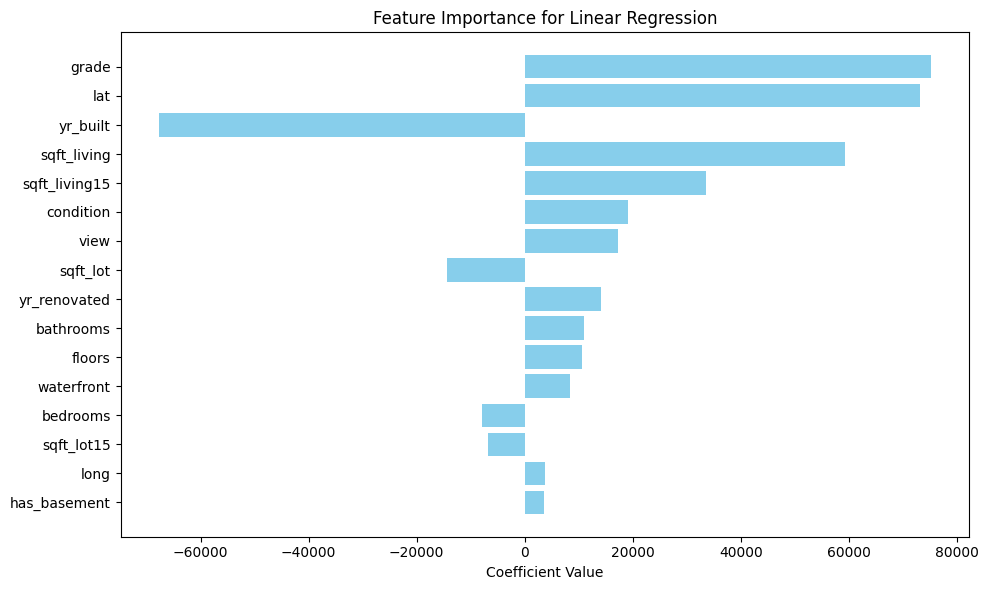

Feature Importance for Linear Regression:
          Feature   Coefficient  Abs_Coefficient
15   has_basement   3482.881969      3482.881969
12           long   3675.599191      3675.599191
14     sqft_lot15  -6868.111337      6868.111337
0        bedrooms  -7990.679846      7990.679846
5      waterfront   8292.734356      8292.734356
4          floors  10564.980522     10564.980522
1       bathrooms  11055.118871     11055.118871
10   yr_renovated  14190.283628     14190.283628
3        sqft_lot -14466.757357     14466.757357
6            view  17210.166177     17210.166177
7       condition  19171.378217     19171.378217
13  sqft_living15  33613.562623     33613.562623
2     sqft_living  59245.638091     59245.638091
9        yr_built -67656.052215     67656.052215
11            lat  73116.729163     73116.729163
8           grade  75162.637911     75162.637911


In [135]:
# ------------------------------
# FEATURE IMPORTANCE PLOTTING (LINEAR)
# ------------------------------

# Get the model's coefficients
coefficients = linear_reg.coef_

# Create a DataFrame for feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort the importance by absolute value of the coefficient
importance['Abs_Coefficient'] = importance['Coefficient'].abs()
importance = importance.sort_values(by='Abs_Coefficient', ascending=True)

# Plot the horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'], importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance for Linear Regression')
plt.tight_layout()
plt.show()

# print the coefficients for each feature
print("Feature Importance for Linear Regression:")
print(importance)

In [136]:
# ------------------------------
# LASSO REGRESSION MODEL
# ------------------------------

from sklearn.linear_model import Lasso

# 1. Initialize Lasso Regression (alpha = regularization strength)
lasso = Lasso(alpha=1.0)

# 2. Fit model to training data
lasso.fit(X_train_scaled, y_train)

# 3. Predict on test data
y_pred_lasso = lasso.predict(X_test_scaled)

# 4. Evaluate performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mean_price = y_test.mean()

print("\nLasso Regression Results:")
print(f"Mean Squared Error: {mse_lasso:.2f}")
print(f"Root Mean Squared Error: ${rmse_lasso:,.2f}")
print(f"R-squared Score: {r2_lasso:.4f}")
print(f"Mean House Price in Test Set: ${mean_price:,.2f}")

print()
cv_scores_lasso = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='r2')
print("Lasso Regression Cross-Validation R² Scores:", cv_scores_lasso)
print("Mean R² Score:", cv_scores_lasso.mean())


Lasso Regression Results:
Mean Squared Error: 12614221268.95
Root Mean Squared Error: $112,313.05
R-squared Score: 0.7011
Mean House Price in Test Set: $469,132.80

Lasso Regression Cross-Validation R² Scores: [0.6833586  0.69968863 0.72095992 0.69993443 0.68865351]
Mean R² Score: 0.6985190194940996


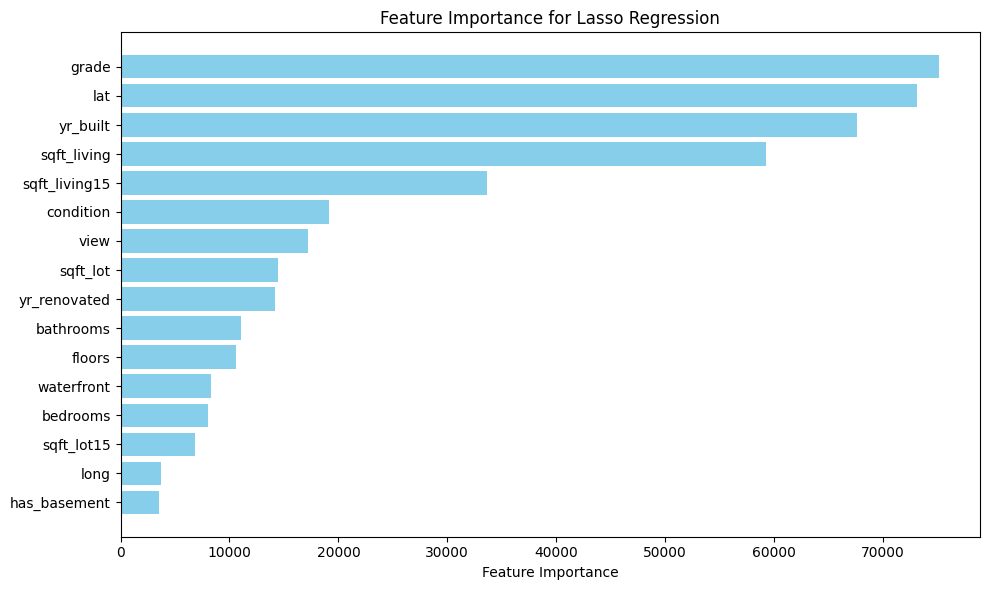

Feature Importance for Lasso Regression:
          Feature    Importance
15   has_basement   3481.601395
12           long   3673.390302
14     sqft_lot15   6867.249483
0        bedrooms   7988.150693
5      waterfront   8291.787157
4          floors  10563.729629
1       bathrooms  11054.839153
10   yr_renovated  14178.109030
3        sqft_lot  14466.303812
6            view  17210.004517
7       condition  19169.507802
13  sqft_living15  33612.382377
2     sqft_living  59244.912169
9        yr_built  67642.813795
11            lat  73116.197799
8           grade  75162.540411


In [137]:
# ------------------------------
# FEATURE IMPORTANCE VISUALIZATION (LASSO REGRESSION)
# ------------------------------

# Get the coefficients of the Lasso model (the feature importance)
coef = lasso.coef_

# Create a DataFrame to organize feature names and their corresponding importance
feature_names = X.columns  # Get the feature names
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coef)  # Absolute value of coefficients for importance
})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Lasso Regression')
plt.tight_layout()
plt.show()

# print the coefficients for each feature
print("Feature Importance for Lasso Regression:")
print(feature_importance)

In [138]:
# ------------------------------
# WHICH FEATURES DID LASSO SHRINK TO ZERO?
# ------------------------------

# Get feature names
feature_names = X.columns

# Get coefficients from the fitted model
lasso_coefficients = lasso.coef_

# Combine into a DataFrame for easier viewing
lasso_results = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": lasso_coefficients
})

# Features with zero coefficients
zero_coeff_features = lasso_results[lasso_results["Coefficient"] == 0]

print("\nFeatures Lasso set to zero:")
print(zero_coeff_features if not zero_coeff_features.empty else "None — all features retained.")



Features Lasso set to zero:
None — all features retained.


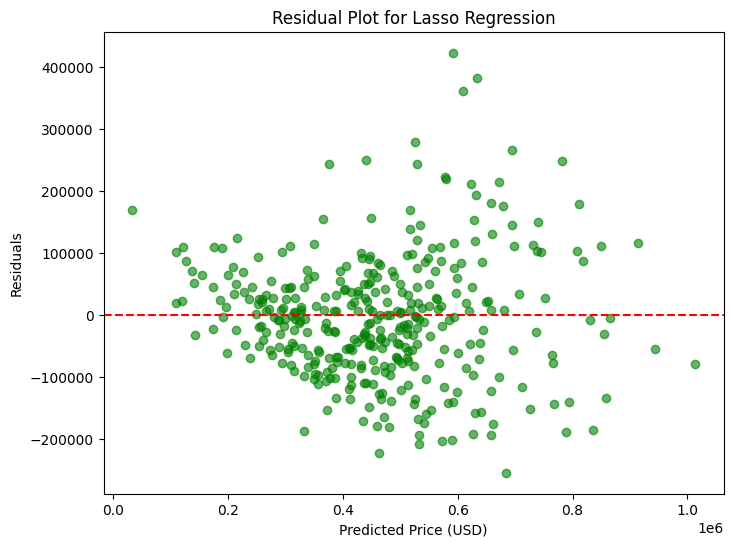

In [139]:
# ------------------------------
# RESIDUAL PLOT FOR LASSO REGRESSION
# ------------------------------

import matplotlib.pyplot as plt
import numpy as np

# 1. Calculate residuals
residuals_lasso = y_test - y_pred_lasso

# 2. Sample a subset of the test data (e.g., 10% of the data) to avoid clutter
sampled_data_lasso = np.random.choice(len(y_test), size=int(len(y_test) * 0.1), replace=False)
y_test_sampled_lasso = y_test.iloc[sampled_data_lasso]
y_pred_sampled_lasso = y_pred_lasso[sampled_data_lasso]
residuals_sampled_lasso = residuals_lasso.iloc[sampled_data_lasso]

# 3. Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_sampled_lasso, residuals_sampled_lasso, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at zero
plt.title('Residual Plot for Lasso Regression')
plt.xlabel('Predicted Price (USD)')
plt.ylabel('Residuals')
plt.show()


In [140]:
# ------------------------------
# KNN REGRESSOR MODEL
# ------------------------------

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Define your features and target variable
X = king_county_housing.drop(["price", "date"], axis=1)  # drop non-numeric/date columns
y = king_county_housing["price"]

# 2. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)

# 5. Fit model
knn.fit(X_train_scaled, y_train)

# 6. Make predictions
y_pred_knn = knn.predict(X_test_scaled)

# 7. Evaluate model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_price_knn = y_test.mean()

# 8. Print results
print("KNN Regression Results:")
print(f"Mean Squared Error: {mse_knn:.2f}")
print(f"Root Mean Squared Error: ${rmse_knn:,.2f}")
print(f"R-squared Score: {r2_knn:.4f}")
print(f"Mean House Price in Test Set: ${mean_price_knn:,.2f}")

print()
cv_scores_knn = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='r2')
print("KNN Regressor Cross-Validation R² Scores:", cv_scores_knn)
print("Mean R² Score:", cv_scores_knn.mean())

KNN Regression Results:
Mean Squared Error: 9619352825.09
Root Mean Squared Error: $98,078.30
R-squared Score: 0.7721
Mean House Price in Test Set: $469,132.80

KNN Regressor Cross-Validation R² Scores: [0.76040117 0.76952013 0.78177557 0.76425395 0.76308144]
Mean R² Score: 0.7678064533448177


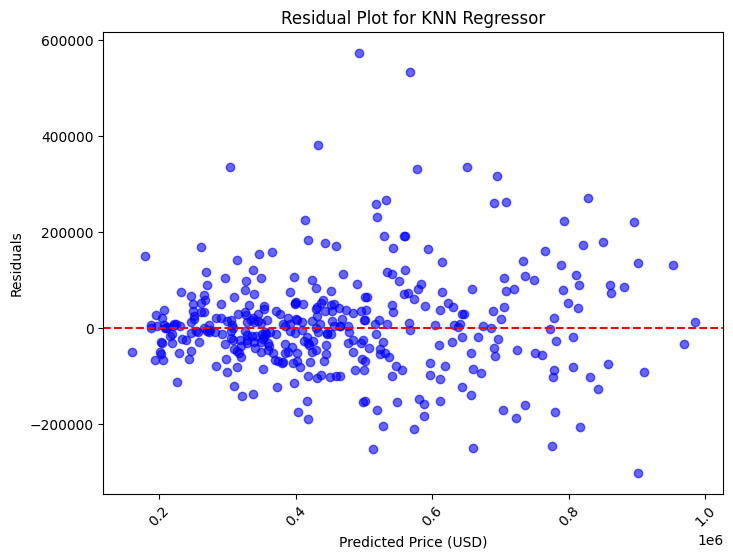

In [141]:
# ------------------------------
# RESIDUAL PLOT FOR KNN REGRESSOR
# ------------------------------

import matplotlib.pyplot as plt
import numpy as np

# 1. Calculate residuals
residuals = y_test - y_pred_knn

# 2. Sample a subset of the test data (10% of the data) to avoid clutter
sampled_data = np.random.choice(len(y_test), size=int(len(y_test) * 0.1), replace=False)
y_test_sampled = y_test.iloc[sampled_data]
y_pred_sampled = y_pred_knn[sampled_data]
residuals_sampled = residuals.iloc[sampled_data]

# 3. Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_sampled, residuals_sampled, alpha=0.6, color='blue')

# Add a horizontal line at zero
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for KNN Regressor')
plt.xlabel('Predicted Price (USD)')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.show()


In [142]:
# ------------------------------
# RANDOM FOREST REGRESSOR MODEL
# ------------------------------

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor with 100 trees and a fixed random state for reproducibility
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the standardized training data
rf.fit(X_train_scaled, y_train)

# Generate predictions on the test data
y_pred_rf = rf.predict(X_test_scaled)

# Calculate evaluation metrics: Mean Squared Error (MSE), Root MSE, and R-squared
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print out the model performance results
print("Random Forest Results:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Root Mean Squared Error: ${rmse_rf:,.2f}")
print(f"R-squared Score: {r2_rf:.4f}")
print(f"Mean House Price in Test Set: ${y_test.mean():,.2f}")

print()
cv_scores_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='r2')
print("Random Forest Cross-Validation R² Scores:", cv_scores_rf)
print("Mean R² Score:", cv_scores_rf.mean())

Random Forest Results:
Mean Squared Error: 5624267765.27
Root Mean Squared Error: $74,995.12
R-squared Score: 0.8667
Mean House Price in Test Set: $469,132.80

Random Forest Cross-Validation R² Scores: [0.86526939 0.86473798 0.87098075 0.86423174 0.87063467]
Mean R² Score: 0.8671709058657369


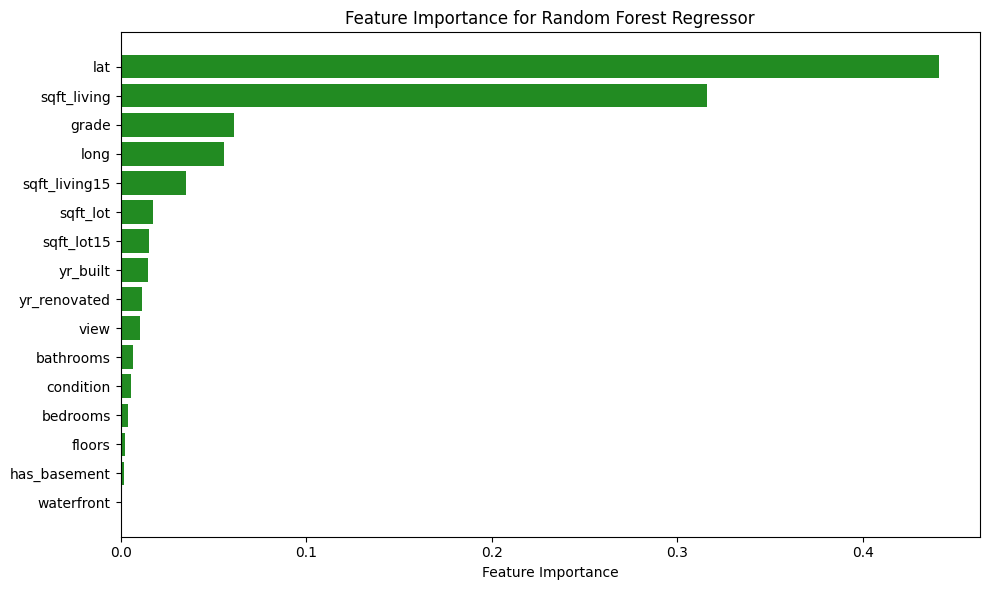

In [143]:
# Create a DataFrame with feature importances
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='forestgreen')
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Random Forest Regressor")
plt.tight_layout()
plt.show()

In [144]:
# print the output for random forest regressor feature importance
print("Feature Importance for Random Forest Regressor:")
# sort in descending order
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
print(feature_importance_rf)

Feature Importance for Random Forest Regressor:
          Feature  Importance
11            lat    0.440968
2     sqft_living    0.315982
8           grade    0.061050
12           long    0.055903
13  sqft_living15    0.034971
3        sqft_lot    0.017272
14     sqft_lot15    0.015136
9        yr_built    0.014834
10   yr_renovated    0.011402
6            view    0.010615
1       bathrooms    0.006791
7       condition    0.005720
0        bedrooms    0.004019
4          floors    0.002507
15   has_basement    0.001835
5      waterfront    0.000996
